# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [94]:
# Sumber dataset dari kaggle yang berisi
# species: species name (kategorical)
# length: length (cm) (numerical)
# weight: weight (g) (numerical)
# w_l_ratio: weight / length (numerical)
# link : https://www.kaggle.com/datasets/taweilo/fish-species-sampling-weight-and-height-data

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [95]:
    import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
    import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
    from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
    from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
    from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
    from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [96]:
# Baca file CSV dari URL
datasetori = pd.read_csv('/content/datasetdalamnotebookclustering.csv')

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
datasetori.head(10)

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
5,Anabas testudineus,9.35,3.28,0.35
6,Anabas testudineus,9.42,3.33,0.35
7,Anabas testudineus,7.92,3.13,0.39
8,Anabas testudineus,6.98,3.16,0.45
9,Anabas testudineus,8.42,3.26,0.39


In [97]:
dataset = datasetori.copy()
print(type(dataset))  # Pastikan ini menunjukkan <class 'pandas.core.frame.DataFrame'>
dataset.head()


<class 'pandas.core.frame.DataFrame'>


,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. **Terdapat Data Kategorikal = Kolom species
Terdapat Data Numerical = Kolom Length, Weight, w_l_ratio
dengan jumlah masing masing 4080 data**

In [98]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [99]:
dataset.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


2. **melakukan pengecekan untuk data yang hilang/ missing**

In [100]:
dataset.isnull().sum()

,0
species,0
length,0
weight,0
w_l_ratio,0


3. **Analisis distribusi dan korelasi**


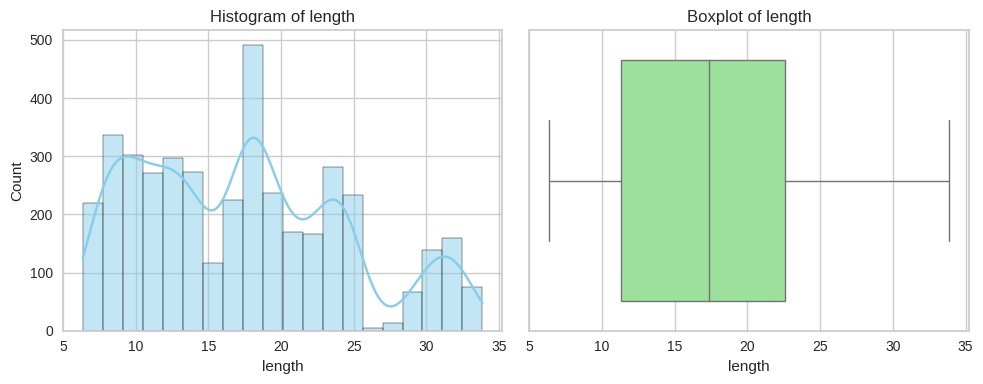

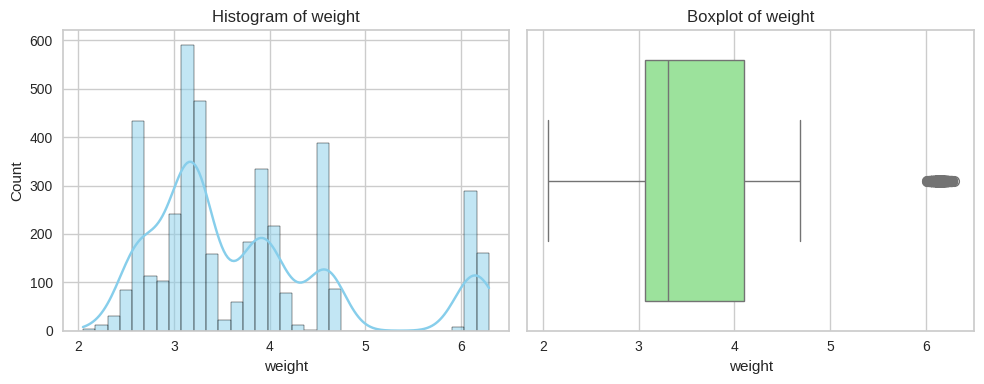

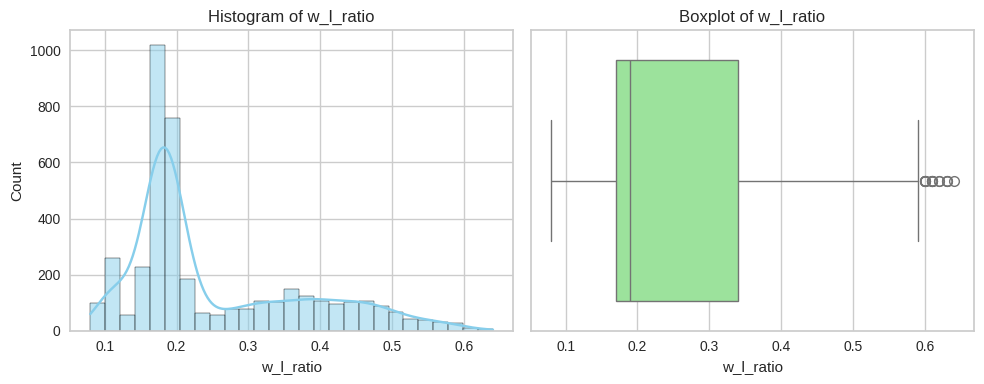


Matriks Korelasi:
              length    weight  w_l_ratio
length     1.000000  0.411584  -0.738174
weight     0.411584  1.000000   0.245835
w_l_ratio -0.738174  0.245835   1.000000


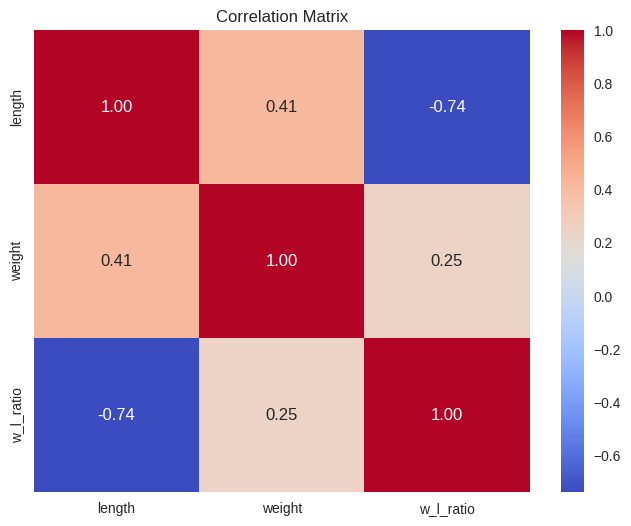

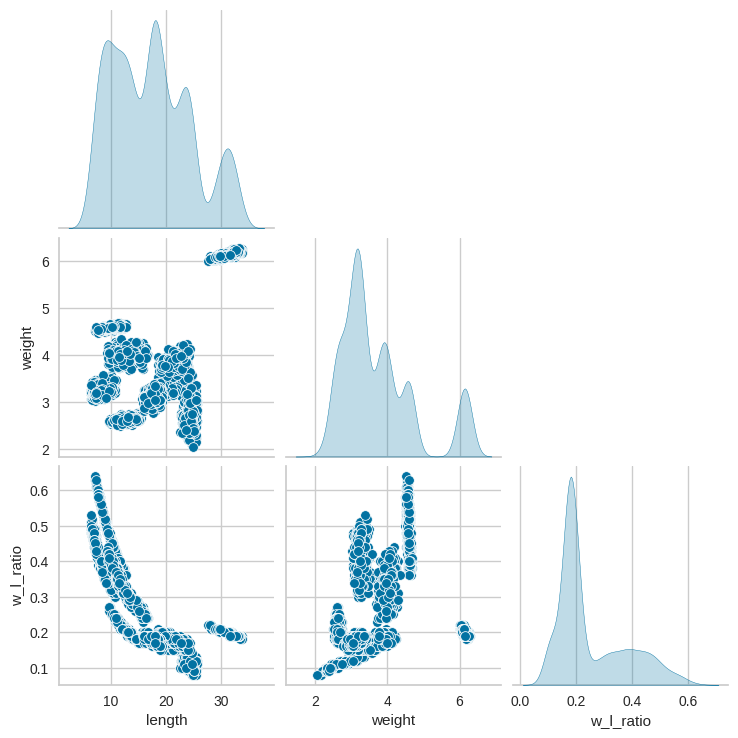

In [101]:
import seaborn as sns

# Visualisasi distribusi
numerical_columns = ["length", "weight", "w_l_ratio"]
for col in numerical_columns:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(dataset[col], kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataset[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

# Analisis Korelasi
# Matriks korelasi
correlation_matrix = dataset[numerical_columns].corr()
print("\nMatriks Korelasi:\n", correlation_matrix)

# Visualisasi matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Scatter plot untuk hubungan antar variabel
sns.pairplot(dataset[numerical_columns], diag_kind="kde", corner=True)
plt.show()


In [102]:
# Menampilkan nama kolom yang ada dalam dataset
print(dataset.columns)


Index(['species', 'length', 'weight', 'w_l_ratio'], dtype='object')


4.**Visualisasi Data**

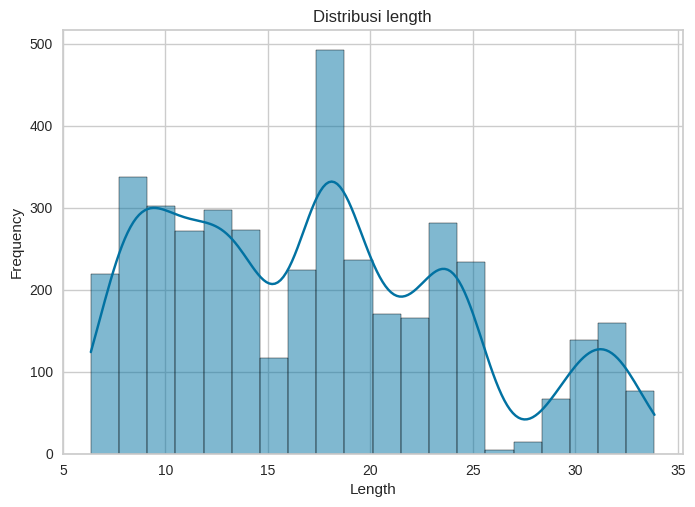

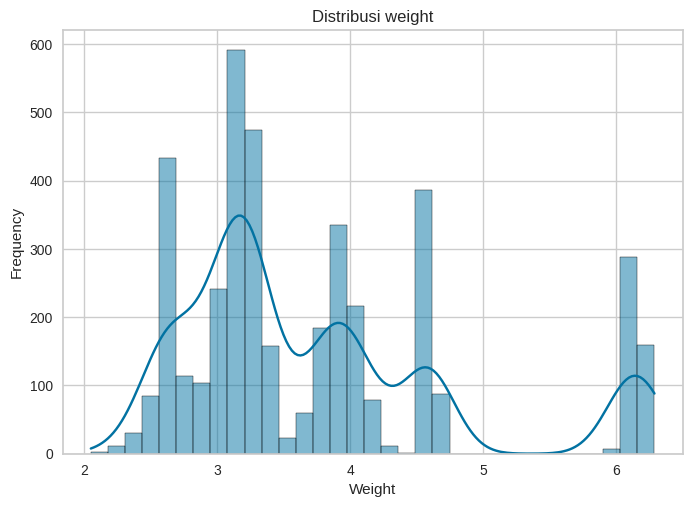

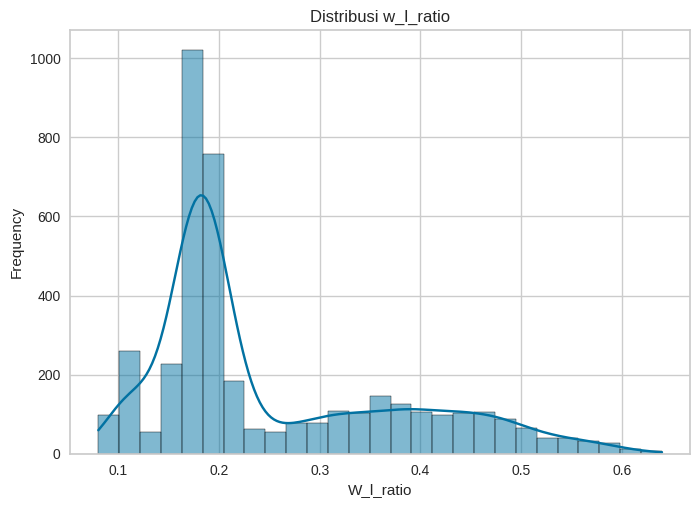

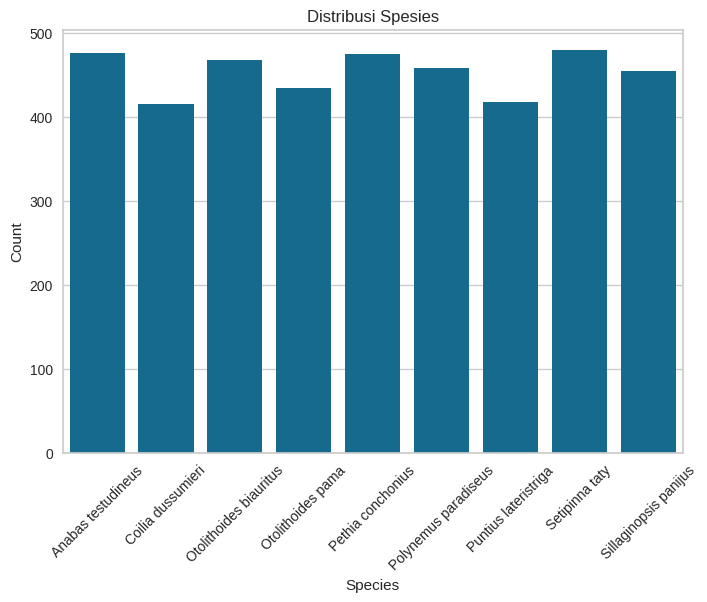

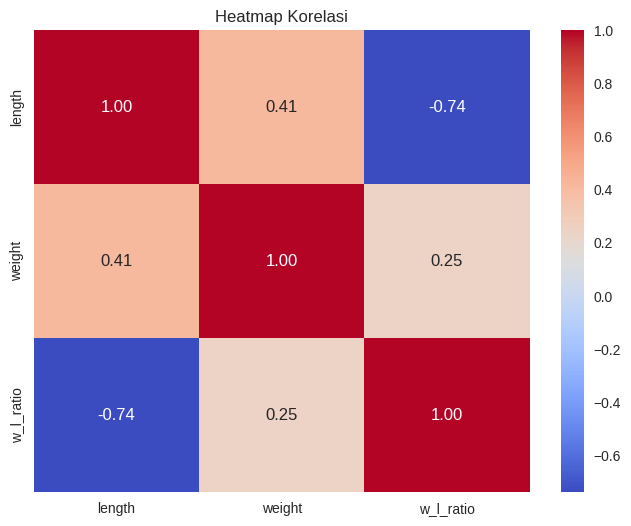

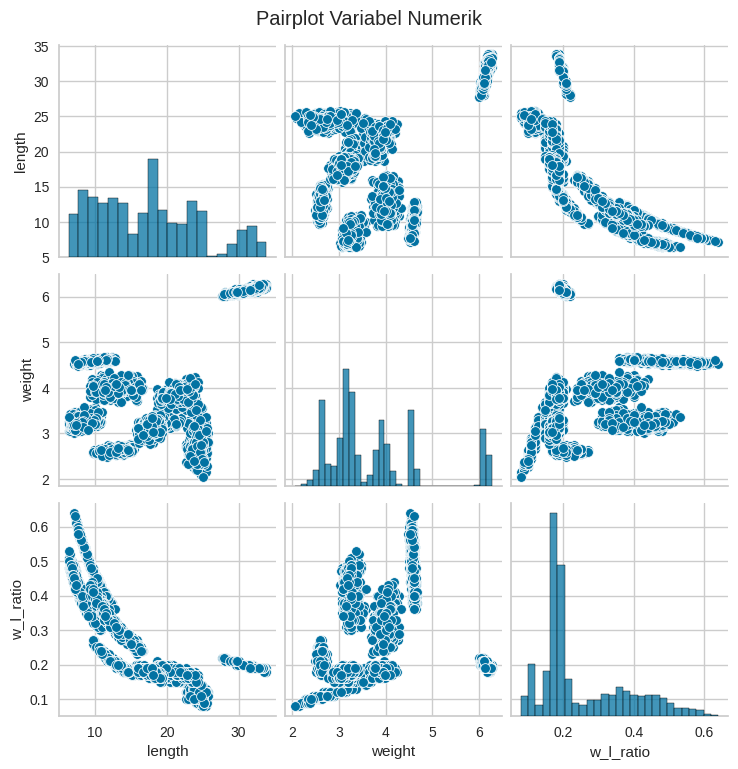

In [103]:
for col in numerical_columns:
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.show()

# 2. Diagram Batang untuk Variabel Kategorikal
sns.countplot(data=dataset, x='species')
plt.title('Distribusi Spesies')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 3. Heatmap Korelasi
plt.figure(figsize=(8, 6))
correlation_matrix = dataset[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

# 4. Pairplot untuk Korelasi Variabel Numerik
sns.pairplot(dataset[numerical_columns])
plt.suptitle('Pairplot Variabel Numerik', y=1.02)
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

1. **Setelah dilakukan pengecekan data kosong, ternyata data dinyatakan lengkap dan tidak ada yang missing value**

2. **Menghapus data duplikat**

In [104]:
# Menghitung jumlah baris duplikat berdasarkan semua kolom
jumlah_duplikat = dataset.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

dataset = dataset.drop_duplicates()
# Menampilkan dataset setelah penghapusan duplikat
print(f"Dataset setelah penghapusan duplikat: {len(dataset)} baris")
dataset.head()

Jumlah baris duplikat: 109
Dataset setelah penghapusan duplikat: 3971 baris


,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


3. **Encoding data kategorical**

In [105]:
le = LabelEncoder()
dataset["species_Encoded"] = le.fit_transform(dataset["species"])
dataset.head(3540)

<ipython-input-105-7fdf1e539631>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["species_Encoded"] = le.fit_transform(dataset["species"])


,species,length,weight,w_l_ratio,species_Encoded
0,Anabas testudineus,10.66,3.45,0.32,0
1,Anabas testudineus,6.91,3.27,0.47,0
2,Anabas testudineus,8.38,3.46,0.41,0
3,Anabas testudineus,7.57,3.36,0.44,0
4,Anabas testudineus,10.83,3.38,0.31,0
...,...,...,...,...,...
3617,Setipinna taty,18.54,3.27,0.18,7
3619,Setipinna taty,17.90,3.39,0.19,7
3620,Setipinna taty,17.98,3.17,0.18,7
3621,Setipinna taty,17.23,3.20,0.19,7


4. **Pendeteksian dan Penanganan Outlier**

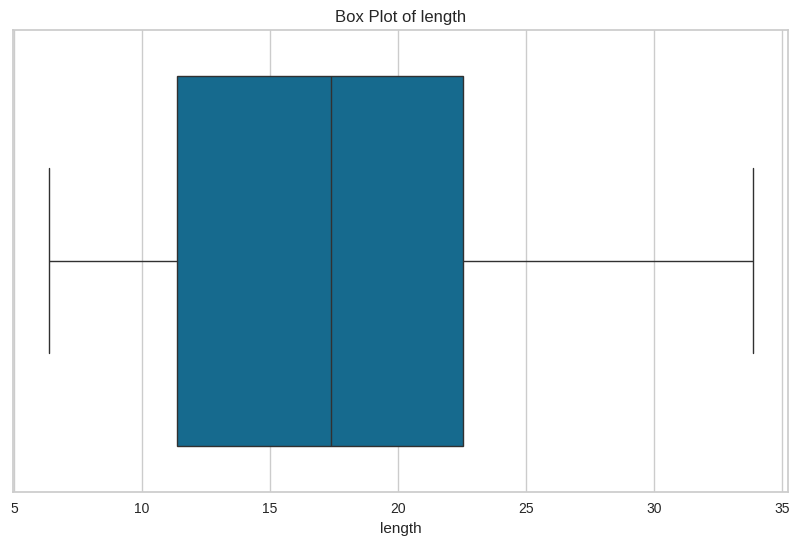

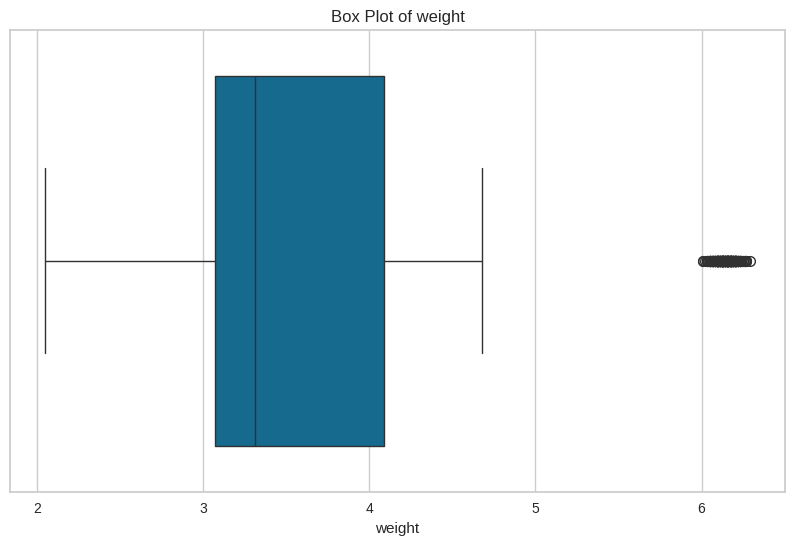

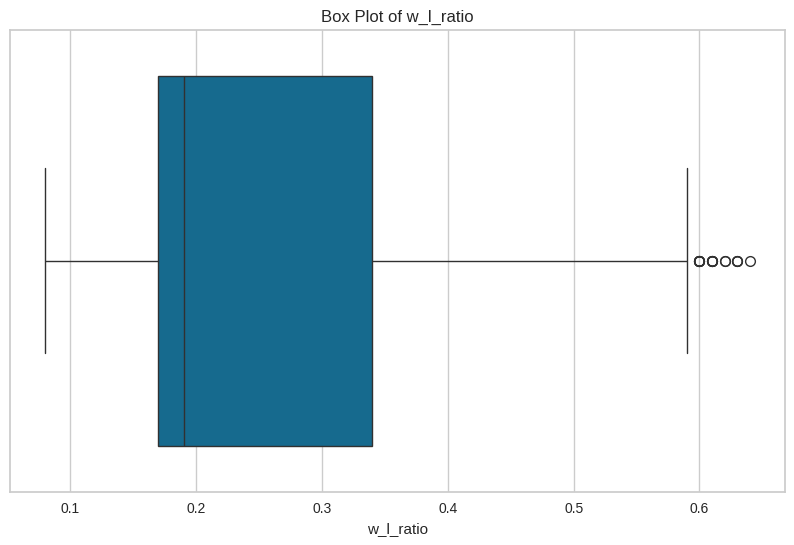

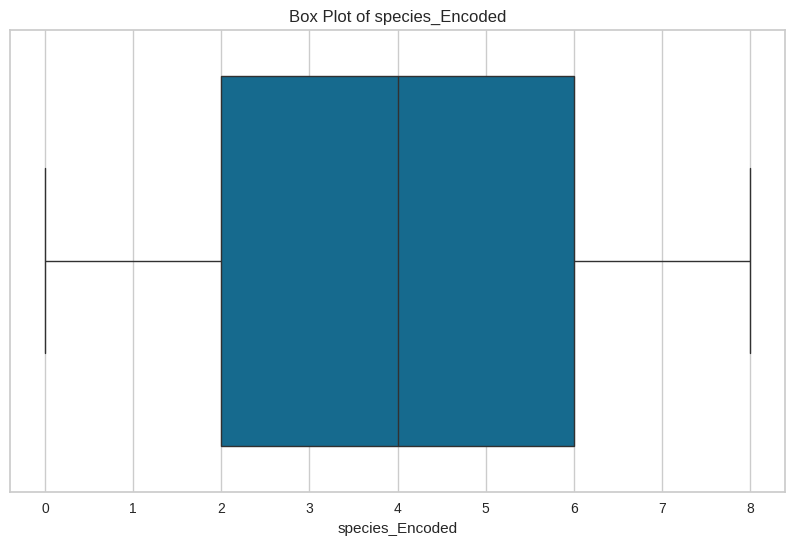

In [106]:
    numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

    for feature in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=dataset[feature])
        plt.title(f'Box Plot of {feature}')
        plt.show()

Data tanpa outlier:
                 species  length  weight  w_l_ratio  species_Encoded
0     Anabas testudineus   10.66    3.45       0.32                0
1     Anabas testudineus    6.91    3.27       0.47                0
2     Anabas testudineus    8.38    3.46       0.41                0
3     Anabas testudineus    7.57    3.36       0.44                0
4     Anabas testudineus   10.83    3.38       0.31                0
...                  ...     ...     ...        ...              ...
3620      Setipinna taty   17.98    3.17       0.18                7
3621      Setipinna taty   17.23    3.20       0.19                7
3622      Setipinna taty   19.01    3.04       0.16                7
3623      Setipinna taty   17.97    3.35       0.19                7
3624      Setipinna taty   18.03    3.04       0.17                7

[3525 rows x 5 columns]


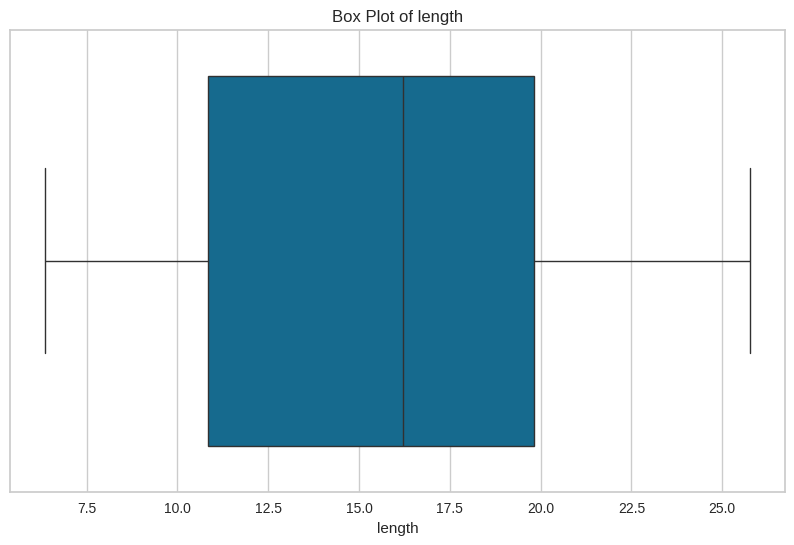

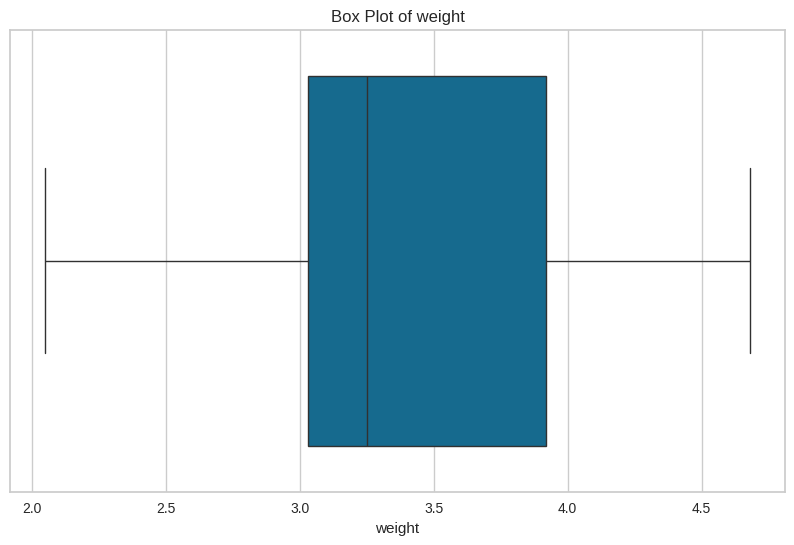

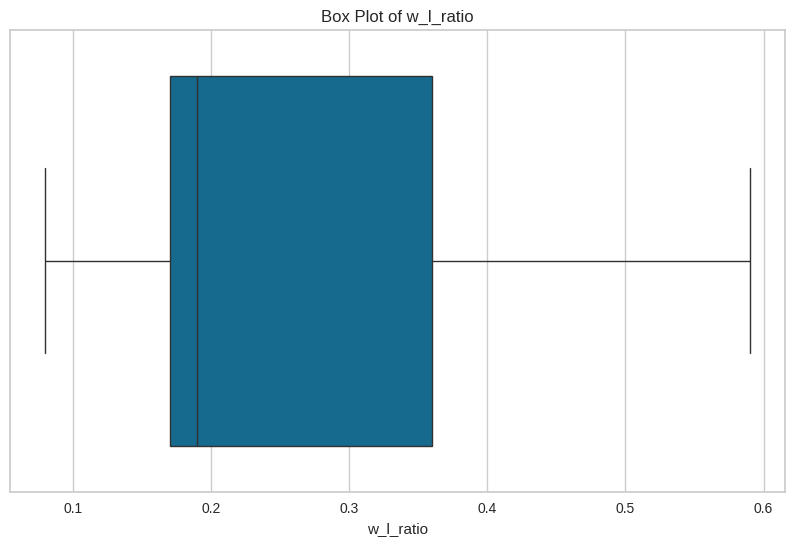

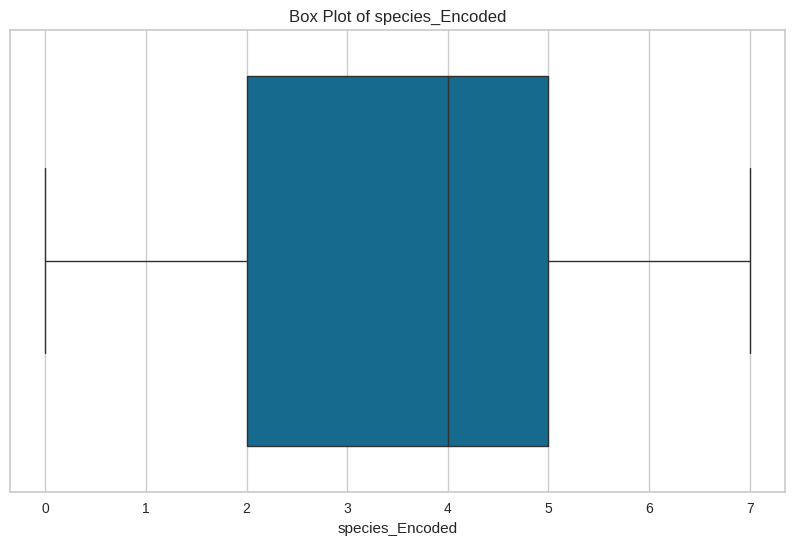

In [107]:
# Pilih hanya kolom numerik dari dataset
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Hitung IQR hanya untuk kolom numerik
Q1 = dataset[numerical_cols].quantile(0.25)
Q3 = dataset[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((dataset[numerical_cols] < (Q1 - 1.5 * IQR)) | (dataset[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
fixsdataset = dataset[condition]

print("Data tanpa outlier:")
print(fixsdataset)

for feature in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=fixsdataset[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


5. **Normalisasi data**

In [108]:
scaler_length = MinMaxScaler()
scaler_weight = MinMaxScaler()
fixsdataset["lengthNorm"] = scaler_length.fit_transform(fixsdataset[["length"]])
fixsdataset["weightNorm"] = scaler_weight.fit_transform(fixsdataset[["weight"]])

<ipython-input-108-867a0facf1b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixsdataset["lengthNorm"] = scaler_length.fit_transform(fixsdataset[["length"]])
<ipython-input-108-867a0facf1b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixsdataset["weightNorm"] = scaler_weight.fit_transform(fixsdataset[["weight"]])


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

1. Algoritma yang digunakan adalah KMeans
2. Latih Data model

In [109]:
X= fixsdataset.iloc[:, [4,5,6]]
X.head()

,species_Encoded,lengthNorm,weightNorm
0,0,0.221649,0.532319
1,0,0.028351,0.463878
2,0,0.104124,0.536122
3,0,0.062371,0.498099
4,0,0.230412,0.505703


In [110]:
from sklearn.cluster import KMeans
    # Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

identified_clusters = kmeans.fit_predict(X)
identified_clusters

data_with_clusters = fixsdataset.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters
    # Menampilkan rentang detail untuk tiap klaster
cluster_details = []
for cluster in data_with_clusters["Cluster"].unique():
    cluster_data = data_with_clusters[data_with_clusters["Cluster"] == cluster]
    cluster_info = {
        "Cluster": cluster,
        "length Min (cm)": cluster_data["length"].min(),
        "length Max (cm)": cluster_data["length"].max(),
        "weight Min": cluster_data["weight"].min(),
        "weight Max": cluster_data["weight"].max(),
        "species": cluster_data["species"].unique().tolist()
    }
    cluster_details.append(cluster_info)

# Menampilkan detail klaster
print("Detail Pembagian Klaster:")
for detail in cluster_details:
    print(f"Cluster {detail['Cluster']}:")
    print(f"  length: {detail['length Min (cm)']} - {detail['length Max (cm)']}")
    print(f"  weight: {detail['weight Min']} - {detail['weight Max']}")
    print(f"  species: {', '.join(detail['species'])}")
    print()


Detail Pembagian Klaster:
Cluster 1:
  length: 6.36 - 25.76
  weight: 2.05 - 3.58
  species: Anabas testudineus, Coilia dussumieri, Otolithoides biauritus

Cluster 0:
  length: 7.66 - 24.35
  weight: 3.47 - 4.68
  species: Otolithoides pama, Pethia conchonius, Polynemus paradiseus

Cluster 2:
  length: 9.69 - 19.48
  weight: 2.49 - 3.41
  species: Puntius lateristriga, Setipinna taty



## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

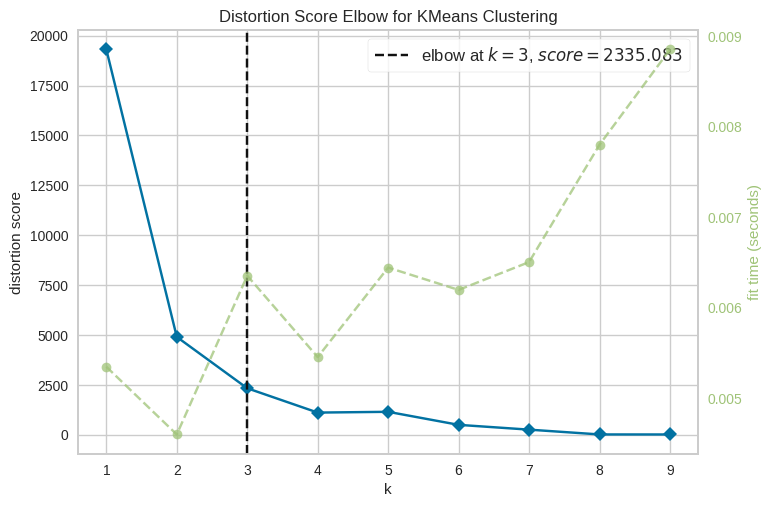

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [111]:
   # Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

    # Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

    # Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

    # Menampilkan grafik elbow untuk analisis
visualizer.show()

In [112]:
# Hitung silhouette score
silhouette_vals = silhouette_score(X, identified_clusters)
# Simpan dalam DataFrame untuk analisis
data_with_silhouette = pd.DataFrame({
    'Cluster': identified_clusters,
    'Silhouette': silhouette_vals
})

# Hitung rata-rata silhouette per klaster
silhouette_per_cluster = data_with_silhouette.groupby('Cluster')['Silhouette'].mean()
print("Silhouette Score per Cluster:")
print(silhouette_per_cluster)

# Total silhouette score
overall_silhouette_score = silhouette_score(X, identified_clusters)
print(f"\nOverall Silhouette Score: {overall_silhouette_score:.2f}")

Silhouette Score per Cluster:
Cluster
0    0.620395
1    0.620395
2    0.620395
Name: Silhouette, dtype: float64

Overall Silhouette Score: 0.62


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [113]:
# Pilih kolom numerik yang akan digunakan untuk clustering
numerical_cols = ["length", "weight", "w_l_ratio"]

# Pastikan kolom tersedia dalam dataset
if not all(col in dataset.columns for col in numerical_cols):
    raise ValueError("Beberapa kolom numerik tidak ditemukan dalam dataset!")

# Normalisasi data sebelum PCA
scaler = MinMaxScaler()
X = scaler.fit_transform(dataset[numerical_cols])

# Apply PCA untuk reduksi dimensi
pca = PCA(n_components=0.95)  # Menjaga 95% varians dari data asli
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(X_pca)

# Menampilkan hasil
print("Dimensi awal data:", X.shape)
print("Dimensi setelah PCA:", X_pca.shape)


Dimensi awal data: (3971, 3)
Dimensi setelah PCA: (3971, 2)


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

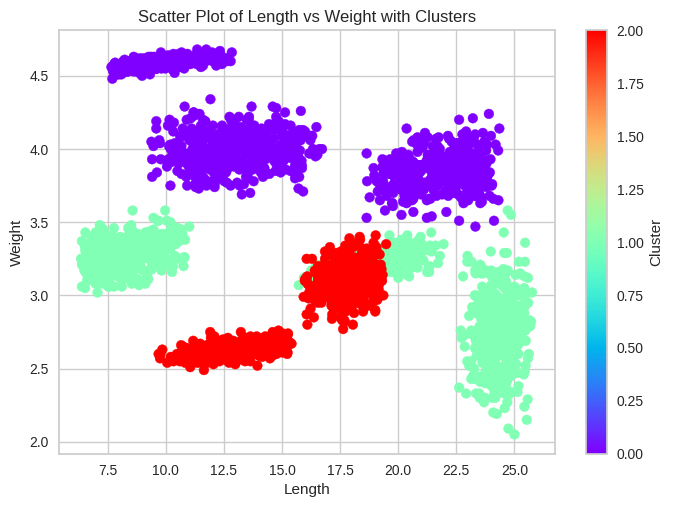

Kolom 'Cluster' tidak ditemukan. Menjalankan ulang KMeans...


<ipython-input-114-5904a0088ff5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixsdataset["Cluster"] = kmeans.fit_predict(fixsdataset[["length", "weight", "w_l_ratio"]].values)


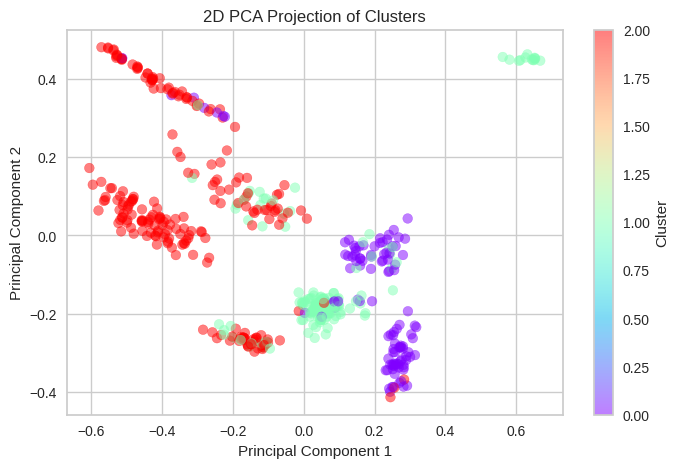

In [114]:
plt.scatter(data_with_clusters['length'], data_with_clusters['weight'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('Scatter Plot of Length vs Weight with Clusters')
plt.colorbar(label='Cluster')
plt.show()

# Pastikan 'Cluster' ada dalam dataset
if "Cluster" not in fixsdataset.columns:
    print("Kolom 'Cluster' tidak ditemukan. Menjalankan ulang KMeans...")

    # Jalankan kembali KMeans jika belum dilakukan
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    fixsdataset["Cluster"] = kmeans.fit_predict(fixsdataset[["length", "weight", "w_l_ratio"]].values)

# **Subsampling dengan mempertahankan hubungan antara X_pca_df dan Cluster**
subsample_size = min(500, len(fixsdataset))  # Maksimum 500 data atau semua data jika kurang dari itu

# Ambil sampel dari dataset yang sudah memiliki 'Cluster'
subsampled_data = fixsdataset.sample(n=subsample_size, random_state=42)

# **Ambil data PCA yang sesuai dengan sampel dataset**
X_pca_sampled = X_pca_df.loc[subsampled_data.index].values  # Pastikan indeks sesuai
clusters_pca_sampled = subsampled_data["Cluster"].values  # Gunakan cluster yang sesuai

# **Visualisasi PCA Projection (2D PCA Scatter Plot)**
plt.figure(figsize=(8, 5))
plt.scatter(X_pca_sampled[:, 0], X_pca_sampled[:, 1], c=clusters_pca_sampled, cmap='rainbow', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection of Clusters')
plt.colorbar(label='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [118]:
cluster_summary = fixsdataset.groupby("Cluster").agg({
    "length": ["min", "max", "mean"],
    "weight": ["min", "max", "mean"],
    "species": lambda x: list(x.unique())
}).reset_index()

Pertanyaan Pertama
- **Analisis Karakteristik Tiap Cluster**
1. Cluster 1:
- Cluster 1 (Panjang dan Berat Lebih Besar):

    Panjang (Length): 7.66 - 24.35 cm
    Berat (Weight): 3.47 - 4.68 g
    Spesies: Otolithoides pama, Pethia conchonius, Polynemus paradiseus

- Kategori: Cluster dengan panjang dan berat yang lebih besar dibandingkan dengan cluster lainnya. Dapat dianggap sebagai kelompok dengan ukuran relatif lebih besar.
2. Cluster 2:
- Cluster 2 (Panjang dan Berat Sedang):

    Panjang (Length): 6.36 - 25.76 cm
    Berat (Weight): 2.05 - 3.58 g
    Spesies: Anabas testudineus, Coilia dussumieri, Otolithoides biauritus

- Kategori: Cluster dengan panjang dan berat yang bervariasi dalam rentang lebih kecil, namun lebih cenderung pada ukuran sedang.
3. Cluster 3:
- Cluster 3 (Panjang dan Berat Kecil):

    Panjang (Length): 9.69 - 19.48 cm
    Berat (Weight): 2.49 - 3.41 g
    Spesies: Puntius lateristriga, Setipinna taty

 -Kategori: Cluster dengan panjang dan berat yang lebih kecil dibandingkan dengan Cluster 1, tetapi masih berada dalam rentang ukuran yang lebih kecil dibandingkan Cluster 2.

- **jadi:**
  - **Cluster 1: Ukuran besar.**
  - **Cluster 2: Ukuran sedang.**
  - **Cluster 3: Ukuran kecil.**

Pertanyaan Kedua
- **Interpretasi**

1. Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis?:
- Berdasarkan deskripsi yang diberikan, hasil clustering tampaknya konsisten dengan ekspektasi bahwa ada kelompok spesies dengan ukuran yang lebih besar, sedang, dan kecil. Hasil ini juga sesuai dengan logika bisnis jika tujuannya adalah untuk mengelompokkan spesies berdasarkan ukuran fisik untuk tujuan tertentu, seperti pemilihan untuk budidaya atau penelitian lebih lanjut.
2. Apakah ada pola tertentu yang bisa dimanfaatkan?:
- Pola ukuran dalam setiap cluster dapat dimanfaatkan untuk analisis lebih lanjut, misalnya untuk menentukan pola pertumbuhan spesies berdasarkan ukuran, atau untuk keperluan pengelompokan dalam konteks budidaya atau pengelolaan sumber daya alam. Selain itu, pola ini dapat memberikan wawasan tentang hubungan antara ukuran tubuh spesies dengan habitat atau kebiasaan makan mereka.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [115]:
fixsdataset["cluster"] = identified_clusters

<ipython-input-115-1ac2c4d29513>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixsdataset["cluster"] = identified_clusters


In [116]:
fixsdataset.head()

,species,length,weight,w_l_ratio,species_Encoded,lengthNorm,weightNorm,Cluster,cluster
0,Anabas testudineus,10.66,3.45,0.32,0,0.221649,0.532319,2,1
1,Anabas testudineus,6.91,3.27,0.47,0,0.028351,0.463878,2,1
2,Anabas testudineus,8.38,3.46,0.41,0,0.104124,0.536122,2,1
3,Anabas testudineus,7.57,3.36,0.44,0,0.062371,0.498099,2,1
4,Anabas testudineus,10.83,3.38,0.31,0,0.230412,0.505703,2,1


In [117]:
fixsdataset.to_csv("datasetdalamnotebookklasifikasi123.csv", index = False)